In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

# Exploratory Analysis

## Gather

In [3]:
df = pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')

## Assess

> In this section I explore the data to see if there are any data quality issues.
> This process will be guided by both data and intuition - I will make decisions following the general expected trend in the field of nutrition. For example(and   this might be speculative at this point), any age above 200 simply does not make sense. Such a record will most probably be discarded! 

In [4]:
df.sample(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
46747,2015,2015,KY,Kentucky,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have an overweight classification,NaN,Value,31.5,31.5,NaN,NaN,26.3,37.2,695.0,NaN,NaN,NaN,NaN,"$15,000 - $24,999",NaN,"(37.645970271000465, -84.77497104799966)",OWS,OWS1,Q037,VALUE,21,Income,"$15,000 - $24,999",INC,INC1525
42266,2015,2015,NV,Nevada,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-time physical activity,NaN,Value,24.2,24.2,NaN,NaN,21.3,27.4,1995.0,NaN,NaN,NaN,NaN,NaN,Non-Hispanic White,"(39.493240390000494, -117.07184056399967)",PA,PA1,Q047,VALUE,32,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT
20596,2013,2013,NH,New Hampshire,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,NaN,Value,25.5,25.5,NaN,NaN,23.2,28.0,2079.0,NaN,65 or older,NaN,NaN,NaN,NaN,"(43.65595011300047, -71.50036091999965)",OWS,OWS1,Q036,VALUE,33,Age (years),65 or older,AGEYR,AGEYR65PLUS
49113,2016,2016,FL,Florida,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have an overweight classification,NaN,Value,36.5,36.5,NaN,NaN,33.5,39.6,4193.0,NaN,NaN,NaN,NaN,"$35,000 - $49,999",NaN,"(28.932040377000476, -81.92896053899966)",OWS,OWS1,Q037,VALUE,12,Income,"$35,000 - $49,999",INC,INC3550
45852,2015,2015,AK,Alaska,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have an overweight classification,NaN,Value,35.8,35.8,NaN,NaN,30.9,41.1,844.0,NaN,65 or older,NaN,NaN,NaN,NaN,"(64.84507995700051, -147.72205903599973)",OWS,OWS1,Q037,VALUE,2,Age (years),65 or older,AGEYR,AGEYR65PLUS


In [5]:
df.shape

(53392, 33)

> The dataset has 53392 records() and 33 dimensions as represented in the cell above.

In [6]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearStart,53392.0,2013.281465,1.693300,2011.0,2012.0,2013.00,2015.0,2016.0
YearEnd,53392.0,2013.281465,1.693300,2011.0,2012.0,2013.00,2015.0,2016.0
Data_Value_Unit,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Data_Value,48346.0,31.156681,10.247033,0.9,24.1,30.70,37.0,77.6
Data_Value_Alt,48346.0,31.156681,10.247033,0.9,24.1,30.70,37.0,77.6
Low_Confidence_Limit,48346.0,26.892227,10.038584,0.3,20.0,26.45,32.9,69.5
High_Confidence_Limit,48346.0,35.989997,11.205813,3.0,28.2,35.60,42.2,87.7
Sample_Size,48346.0,3889.192860,19829.421290,50.0,566.0,1209.00,2519.0,476876.0
LocationID,53392.0,30.282215,16.821318,1.0,17.0,30.00,44.0,78.0


In [8]:
df.isnull().sum().sort_values()

YearStart                         0
Stratification1                   0
StratificationCategory1           0
LocationID                        0
DataValueTypeID                   0
QuestionID                        0
TopicID                           0
ClassID                           0
StratificationCategoryId1         0
StratificationID1                 0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Type                   0
GeoLocation                    1008
Data_Value                     5046
Sample_Size                    5046
High_Confidence_Limit          5046
Low_Confidence_Limit           5046
Data_Value_Alt                 5046
Race/Ethnicity                38136
Income                        40043
Age(years)                    41954
Education                   

In [9]:
for col in df.columns:
    print(f'{col} has {df[col].nunique()} unique values')

YearStart has 6 unique values
YearEnd has 6 unique values
LocationAbbr has 55 unique values
LocationDesc has 55 unique values
Datasource has 1 unique values
Class has 3 unique values
Topic has 3 unique values
Question has 9 unique values
Data_Value_Unit has 0 unique values
Data_Value_Type has 1 unique values
Data_Value has 669 unique values
Data_Value_Alt has 669 unique values
Data_Value_Footnote_Symbol has 1 unique values
Data_Value_Footnote has 2 unique values
Low_Confidence_Limit has 654 unique values
High_Confidence_Limit  has 723 unique values
Sample_Size has 8123 unique values
Total has 1 unique values
Age(years) has 6 unique values
Education has 4 unique values
Gender has 2 unique values
Income has 7 unique values
Race/Ethnicity has 8 unique values
GeoLocation has 54 unique values
ClassID has 3 unique values
TopicID has 3 unique values
QuestionID has 9 unique values
DataValueTypeID has 1 unique values
LocationID has 55 unique values
StratificationCategory1 has 6 unique values
St

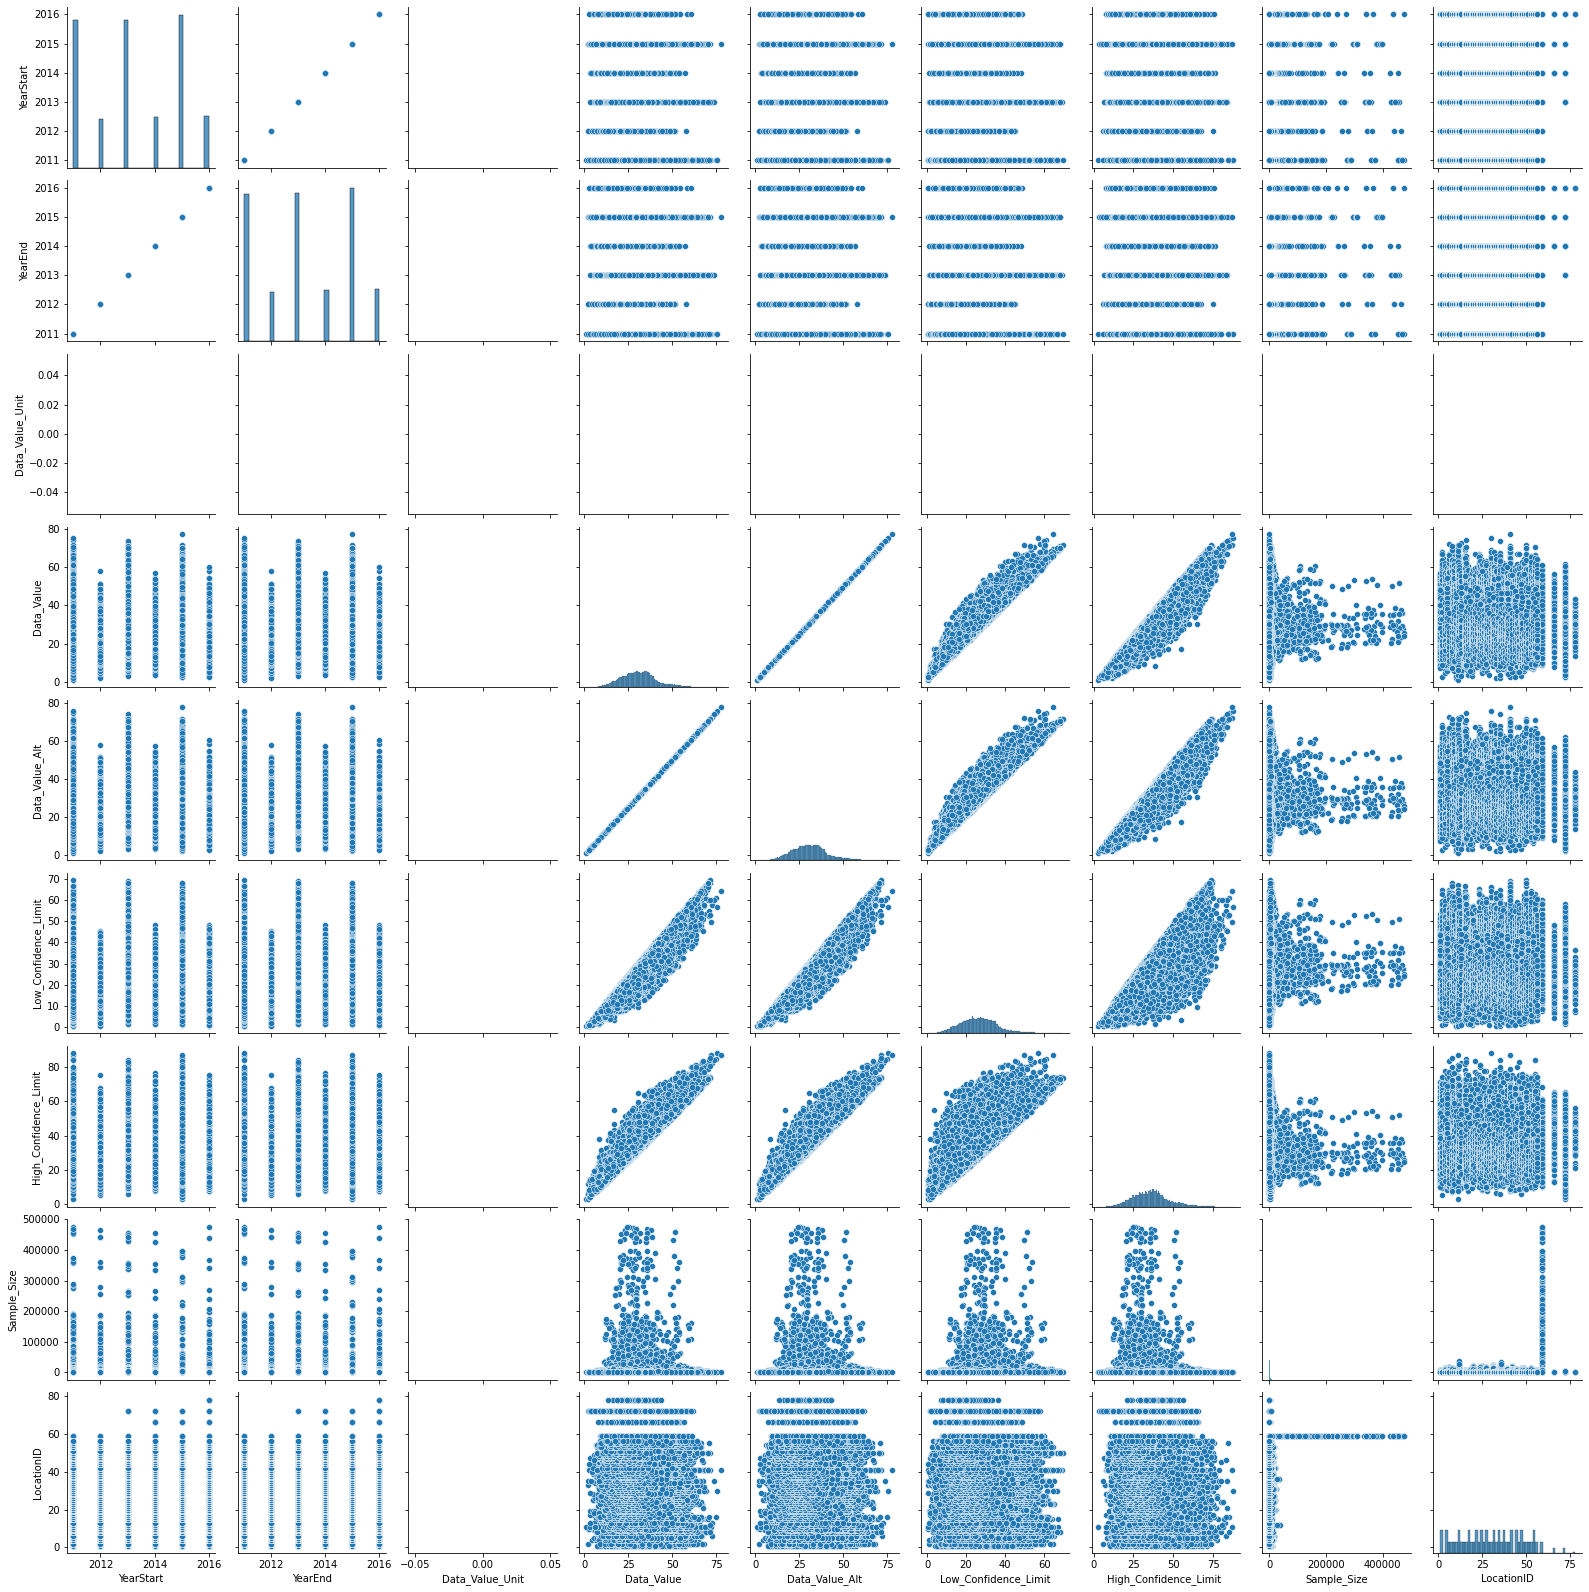

In [10]:
sns.pairplot(df);

In [11]:
df.duplicated().sum()

0

> All records in the dataset are unique

In [12]:
df.dtypes

YearStart                       int64
YearEnd                         int64
LocationAbbr                   object
LocationDesc                   object
Datasource                     object
Class                          object
Topic                          object
Question                       object
Data_Value_Unit               float64
Data_Value_Type                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
Sample_Size                   float64
Total                          object
Age(years)                     object
Education                      object
Gender                         object
Income                         object
Race/Ethnicity                 object
GeoLocation                    object
ClassID                        object
TopicID                        object
QuestionID  

### Issues with data

#### Missing Data

> Missing values could mean that the data is improperly stored, or simply that such data was not captured.
>
> In this section I highlight issues with missing data.

1. GeoLocation has 1008 missing values
2. Data_Value has 5046 missing values
3. Sample_Size has 5046 missing values
4. High_Confidence_Limit has 5046 missing values
5. Low_Confidence_Limit has 5046 missing values
6. Data_Value_Alt has 5046 missing values
7. Race/Ethnicity has 38136 missing values
8. Income has 40043 missing values
9. Age(years) has 41954 missing values
10. Education has 45764 missing values
11. Data_Value_Footnote has 48346 missing values
12. Data_Value_Footnote_Symbol has 48346 missing values
13. Gender has 49578 missing values
14. Total has 51485 missing values
15. Data_Value_Unit has 53392 missing values

#### Data Cleanliness

> Columns which have less than 2 unique values really do not add much to our analysis
>
> All records will most likely have the same value, and so the column can be assumed

1. Datasource has 1 unique value
2. Data_Value_Unit has 0 unique values - this is due to the fact that the column does not have a single non-null value. It shall be handled as a missing data issue.
3. Data_Value_Type has 1 unique value
4. Data_Value_Footnote_Symbol has 1 unique value
5. Total has 1 unique values

#### Data tidiness

> In this subsection, issues of atomicity of data will be higlighted.
>
> To make for easy analysis, the following guidelines should be adhered to;
>
>1. Each variable should have its own column
>2. Each observation should be a row (no duplicates should exist)
>3. Each organizational unit should be a table/dataset

> The intention is to separate each dataset on its own, then later bring it together in an organized manner. For example, it does not make for good viewing that location alone is represented with 4 different columns in the same dataset.

1. The dataset has a semi-dataset that represents questions
2. The dataset has a semi-dataset that represents topics
3. The dataset has a semi-dataset that represents classes
4. The dataset has a semi-dataset that represents locations
5. The dataset has a semi-dataset that represents stratifications
6. YearStart has a perfect correlation to YearEnd - this could mean that they contain the same values, which then makes one of the columns redundant
7. Data_Value has a perfect correlation to Data_Value_Alt

### Cleaning data

In this section I address the issues outlined above. This step will be repetitive, to try and obtain clean and tidy data

##### Problem Definition

The dataset has a semi-dataset that represents questions

##### Resolution Plan

Create a dataset that contains only information about questions

##### Implementation and Testing

In [13]:
questions_df = df[['QuestionID', 'Question']].drop_duplicates()
questions_df.reset_index(drop=True, inplace=True)
questions_df.head()

,QuestionID,Question
0,Q036,Percent of adults aged 18 years and older who have obesity
1,Q037,Percent of adults aged 18 years and older who have an overweight classification
2,Q018,Percent of adults who report consuming fruit less than one time daily
3,Q019,Percent of adults who report consuming vegetables less than one time daily
4,Q046,Percent of adults who engage in muscle-strengthening activities on 2 or more days a week


> We now have an atomic dataset representing questions alone.
>
>We can use the QuestionID to reference a question in a different table.

In [14]:
questions_df.shape

(9, 2)

In [15]:
questions_df

,QuestionID,Question
0,Q036,Percent of adults aged 18 years and older who have obesity
1,Q037,Percent of adults aged 18 years and older who have an overweight classification
2,Q018,Percent of adults who report consuming fruit less than one time daily
3,Q019,Percent of adults who report consuming vegetables less than one time daily
4,Q046,Percent of adults who engage in muscle-strengthening activities on 2 or more days a week
5,Q043,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
6,Q044,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week
7,Q045,Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
8,Q047,Percent of adults who engage in no leisure-time physical activity


##### Problem Definition

The dataset has a semi-dataset that represents topics

##### Resolution plan

Create a dataset that contains only information about topics

##### Implementation and Testing

In [16]:
topics_df = df[['TopicID', 'Topic']].drop_duplicates()
topics_df.reset_index(drop=True, inplace=True)
topics_df.head()

,TopicID,Topic
0,OWS1,Obesity / Weight Status
1,FV1,Fruits and Vegetables - Behavior
2,PA1,Physical Activity - Behavior


In [17]:
topics_df.shape

(3, 2)

##### Problem Definition

The dataset has a semi-dataset that represents classes

##### Resolution Plan

Create a dataset that contains only information about classes

##### Implementation and Testing

In [18]:
classes_df = df[['ClassID', 'Class']].drop_duplicates()
classes_df.reset_index(drop=True, inplace=True)
classes_df.head()

,ClassID,Class
0,OWS,Obesity / Weight Status
1,FV,Fruits and Vegetables
2,PA,Physical Activity


In [19]:
classes_df.shape

(3, 2)

> It is becoming clear that classes and topics could be very related. This means that our initial dataset had 4 columns representing the same dimension.

##### Problem Definition

The dataset has a semi-dataset that represents locations

##### Resolution Plan

Create a dataset that contains only information about location

##### Implementation and Testing

In [20]:
location_df = df[['LocationID', 'LocationAbbr', 'GeoLocation', 'LocationDesc']].drop_duplicates()
location_df.reset_index(drop=True, inplace=True)
location_df.head()

,LocationID,LocationAbbr,GeoLocation,LocationDesc
0,1,AL,"(32.84057112200048, -86.63186076199969)",Alabama
1,59,US,NaN,National
2,2,AK,"(64.84507995700051, -147.72205903599973)",Alaska
3,4,AZ,"(34.865970280000454, -111.76381127699972)",Arizona
4,5,AR,"(34.74865012400045, -92.27449074299966)",Arkansas


In [21]:
location_df.shape

(55, 4)

##### Problem Definition

The dataset contains a semi-dataset the represents information on how stratification was done

##### Resolution Plan

Create a dataset that contains only information about stratification

##### Implementation and Testing

In [22]:
stratification_df = df[['Stratification1', 'StratificationID1']].drop_duplicates()
stratification_df.reset_index(drop=True, inplace=True)

categories_df = df[['StratificationCategory1', 'StratificationCategoryId1']].drop_duplicates()
categories_df.reset_index(drop=True, inplace=True)

In [23]:
stratification_df.head()

,Stratification1,StratificationID1
0,Total,OVERALL
1,Male,MALE
2,Female,FEMALE
3,Less than high school,EDUHS
4,High school graduate,EDUHSGRAD


In [24]:
categories_df.head()

,StratificationCategory1,StratificationCategoryId1
0,Total,OVR
1,Gender,GEN
2,Education,EDU
3,Age (years),AGEYR
4,Income,INC


In [25]:
stratification_df.shape

(28, 2)

In [26]:
categories_df.shape

(6, 2)

In [27]:
categories_df

,StratificationCategory1,StratificationCategoryId1
0,Total,OVR
1,Gender,GEN
2,Education,EDU
3,Age (years),AGEYR
4,Income,INC
5,Race/Ethnicity,RACE


##### Problem Definition

Some columns in the dataset have less than 2 unique values

##### Resolution Plan

Exclude from the dataset columns which have at most 1 unique value

##### Implementation and Testing

In [28]:
df_clean = df.drop(['Datasource', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Total', 'DataValueTypeID'], axis=1)
df_clean.sample(4)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Data_Value,Data_Value_Alt,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
23294,2013,2013,NC,North Carolina,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,8.1,8.1,NaN,2.3,24.6,92.0,NaN,NaN,NaN,NaN,Asian,"(35.466220975000454, -79.15925046299964)",OWS,OWS1,Q036,37,Race/Ethnicity,Asian,RACE,RACEASN
3029,2012,2012,CA,California,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-time physical activity,10.4,10.4,NaN,5.7,18.2,83.0,NaN,NaN,NaN,NaN,Hawaiian/Pacific Islander,"(37.63864012300047, -120.99999953799971)",PA,PA1,Q047,6,Race/Ethnicity,Hawaiian/Pacific Islander,RACE,RACEHPI
36915,2015,2015,NJ,New Jersey,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetables less than one time daily,31.1,31.1,NaN,27.0,35.6,1165.0,NaN,NaN,NaN,NaN,Non-Hispanic Black,"(40.13057004800049, -74.27369128799967)",FV,FV1,Q019,34,Race/Ethnicity,Non-Hispanic Black,RACE,RACEBLK
29129,2011,2011,TN,Tennessee,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,22.0,22.0,NaN,17.7,27.0,1381.0,NaN,College graduate,NaN,NaN,NaN,"(35.68094058000048, -85.77449091399967)",OWS,OWS1,Q036,47,Education,College graduate,EDU,EDUCOGRAD


In [29]:
df_clean.shape

(53392, 27)

In [30]:
for col in df_clean.columns:
    print(f'{col} has {df_clean[col].nunique()} unique values')

YearStart has 6 unique values
YearEnd has 6 unique values
LocationAbbr has 55 unique values
LocationDesc has 55 unique values
Class has 3 unique values
Topic has 3 unique values
Question has 9 unique values
Data_Value has 669 unique values
Data_Value_Alt has 669 unique values
Data_Value_Footnote has 2 unique values
Low_Confidence_Limit has 654 unique values
High_Confidence_Limit  has 723 unique values
Sample_Size has 8123 unique values
Age(years) has 6 unique values
Education has 4 unique values
Gender has 2 unique values
Income has 7 unique values
Race/Ethnicity has 8 unique values
GeoLocation has 54 unique values
ClassID has 3 unique values
TopicID has 3 unique values
QuestionID has 9 unique values
LocationID has 55 unique values
StratificationCategory1 has 6 unique values
Stratification1 has 28 unique values
StratificationCategoryId1 has 6 unique values
StratificationID1 has 28 unique values


##### Problem Definition

The dataset contains information that describes different observations

##### Resolution Plan

Exclude information that describe location, categories, classes, topics and questions - only leave IDs which can be used for referencing if there is need

##### Implementation and Testing

In [31]:
atomic_df = df_clean.drop(['LocationID', 'LocationDesc', 'GeoLocation', 'StratificationID1', 'StratificationCategoryId1', 'Class', 'Topic', 'Question', 'TopicID'], axis=1)
atomic_df.sample(4)

,YearStart,YearEnd,LocationAbbr,Data_Value,Data_Value_Alt,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Gender,Income,Race/Ethnicity,ClassID,TopicID,QuestionID,StratificationCategory1,Stratification1
4095,2011,2011,CT,32.2,32.2,NaN,26.8,38.1,501.0,NaN,NaN,NaN,NaN,Hispanic,OWS,OWS1,Q037,Race/Ethnicity,Hispanic
20864,2014,2014,NH,43.1,43.1,NaN,40.4,45.8,2509.0,NaN,NaN,Male,NaN,NaN,OWS,OWS1,Q037,Gender,Male
51614,2016,2016,VT,28.3,28.3,NaN,25.3,31.6,1423.0,NaN,Some college or technical school,NaN,NaN,NaN,OWS,OWS1,Q036,Education,Some college or technical school
34847,2013,2013,WY,32.7,32.7,NaN,29.9,35.6,1599.0,55 - 64,NaN,NaN,NaN,NaN,OWS,OWS1,Q036,Age (years),55 - 64


In [32]:
atomic_df.shape

(53392, 19)

##### Problem Definition

YearStart has a perfect correlation to YearEnd

##### Resolution Plan

Drop one of YearStart and YearEnd, then rename the remaining column as simply Year

##### Implemntation and Testing

In [33]:
atomic_df = atomic_df.drop(['YearEnd'], axis=1)
atomic_df.rename(columns={'YearStart': 'Year'}, inplace=True)
atomic_df.head()

,Year,LocationAbbr,Data_Value,Data_Value_Alt,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Gender,Income,Race/Ethnicity,ClassID,TopicID,QuestionID,StratificationCategory1,Stratification1
0,2011,AL,32.0,32.0,NaN,30.5,33.5,7304.0,NaN,NaN,NaN,NaN,NaN,OWS,OWS1,Q036,Total,Total
1,2011,AL,32.3,32.3,NaN,29.9,34.7,2581.0,NaN,NaN,Male,NaN,NaN,OWS,OWS1,Q036,Gender,Male
2,2011,AL,31.8,31.8,NaN,30.0,33.6,4723.0,NaN,NaN,Female,NaN,NaN,OWS,OWS1,Q036,Gender,Female
3,2011,AL,33.6,33.6,NaN,29.9,37.6,1153.0,NaN,Less than high school,NaN,NaN,NaN,OWS,OWS1,Q036,Education,Less than high school
4,2011,AL,32.8,32.8,NaN,30.2,35.6,2402.0,NaN,High school graduate,NaN,NaN,NaN,OWS,OWS1,Q036,Education,High school graduate


##### Problem Definition

Data_Value has a perfect correlation to Data_Value_Alt

##### Resolution Plan

Drop one of Data_Value and Data_Value_Alt

##### Implementation and Testing

In [34]:
atomic_df = atomic_df.drop(['Data_Value_Alt'], axis=1)
atomic_df.head()

,Year,LocationAbbr,Data_Value,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Gender,Income,Race/Ethnicity,ClassID,TopicID,QuestionID,StratificationCategory1,Stratification1
0,2011,AL,32.0,NaN,30.5,33.5,7304.0,NaN,NaN,NaN,NaN,NaN,OWS,OWS1,Q036,Total,Total
1,2011,AL,32.3,NaN,29.9,34.7,2581.0,NaN,NaN,Male,NaN,NaN,OWS,OWS1,Q036,Gender,Male
2,2011,AL,31.8,NaN,30.0,33.6,4723.0,NaN,NaN,Female,NaN,NaN,OWS,OWS1,Q036,Gender,Female
3,2011,AL,33.6,NaN,29.9,37.6,1153.0,NaN,Less than high school,NaN,NaN,NaN,OWS,OWS1,Q036,Education,Less than high school
4,2011,AL,32.8,NaN,30.2,35.6,2402.0,NaN,High school graduate,NaN,NaN,NaN,OWS,OWS1,Q036,Education,High school graduate


In [35]:
atomic_df.shape

(53392, 17)

In [36]:
atomic_df.isnull().sum().sort_values()

Year                           0
QuestionID                     0
TopicID                        0
ClassID                        0
StratificationCategory1        0
Stratification1                0
LocationAbbr                   0
Sample_Size                 5046
Low_Confidence_Limit        5046
Data_Value                  5046
High_Confidence_Limit       5046
Race/Ethnicity             38136
Income                     40043
Age(years)                 41954
Education                  45764
Data_Value_Footnote        48346
Gender                     49578
dtype: int64

In [46]:
atomic_df.dtypes

Year                         int64
LocationAbbr                object
Data_Value                 float64
Data_Value_Footnote         object
Low_Confidence_Limit       float64
High_Confidence_Limit      float64
Sample_Size                float64
Age(years)                  object
Education                   object
Gender                      object
Income                      object
Race/Ethnicity              object
ClassID                     object
TopicID                     object
QuestionID                  object
StratificationCategory1     object
Stratification1             object
dtype: object

In [40]:
atomic_df['Data_Value_Footnote'].unique()

array([nan, 'Data not available because sample size is insufficient.',
       'Data not available because sample size is insufficient.  If data only missing for the confidence interval, the confidence interval was not calculated.'],
      dtype=object)

In [41]:
atomic_df['Data_Value_Footnote'].value_counts()

Data not available because sample size is insufficient.                                                                                                   4624
Data not available because sample size is insufficient.  If data only missing for the confidence interval, the confidence interval was not calculated.     422
Name: Data_Value_Footnote, dtype: int64

In [86]:
education_df = atomic_df[atomic_df['StratificationCategory1'] == 'Education']
education_df.reset_index(drop=True, inplace=True)
education_df.head()

,Year,LocationAbbr,Data_Value,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Gender,Income,Race/Ethnicity,ClassID,TopicID,QuestionID,StratificationCategory1,Stratification1
0,2011,AL,33.6,NaN,29.9,37.6,1153.0,NaN,Less than high school,NaN,NaN,NaN,OWS,OWS1,Q036,Education,Less than high school
1,2011,AL,32.8,NaN,30.2,35.6,2402.0,NaN,High school graduate,NaN,NaN,NaN,OWS,OWS1,Q036,Education,High school graduate
2,2011,AL,33.8,NaN,31.0,36.8,1925.0,NaN,Some college or technical school,NaN,NaN,NaN,OWS,OWS1,Q036,Education,Some college or technical school
3,2011,AL,26.4,NaN,23.7,29.3,1812.0,NaN,College graduate,NaN,NaN,NaN,OWS,OWS1,Q036,Education,College graduate
4,2011,AL,33.2,NaN,29.2,37.5,1153.0,NaN,Less than high school,NaN,NaN,NaN,OWS,OWS1,Q037,Education,Less than high school


In [88]:
education_df = education_df.drop(['Age(years)', 'Income', 'Race/Ethnicity', 'Data_Value_Footnote', 'Gender', 'StratificationCategory1', 'Stratification1'], axis=1)
education_df.head()

,Year,LocationAbbr,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Education,ClassID,TopicID,QuestionID
0,2011,AL,33.6,29.9,37.6,1153.0,Less than high school,OWS,OWS1,Q036
1,2011,AL,32.8,30.2,35.6,2402.0,High school graduate,OWS,OWS1,Q036
2,2011,AL,33.8,31.0,36.8,1925.0,Some college or technical school,OWS,OWS1,Q036
3,2011,AL,26.4,23.7,29.3,1812.0,College graduate,OWS,OWS1,Q036
4,2011,AL,33.2,29.2,37.5,1153.0,Less than high school,OWS,OWS1,Q037


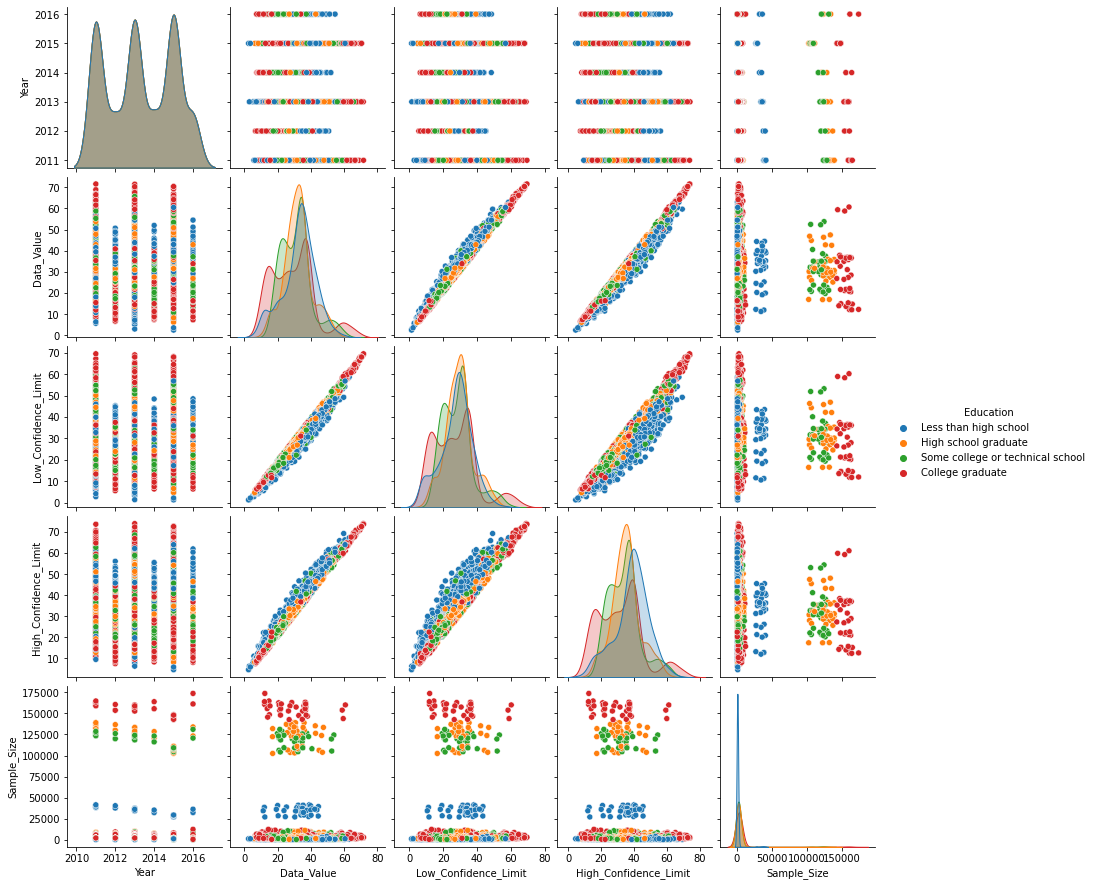

In [90]:
sns.pairplot(education_df, hue='Education');

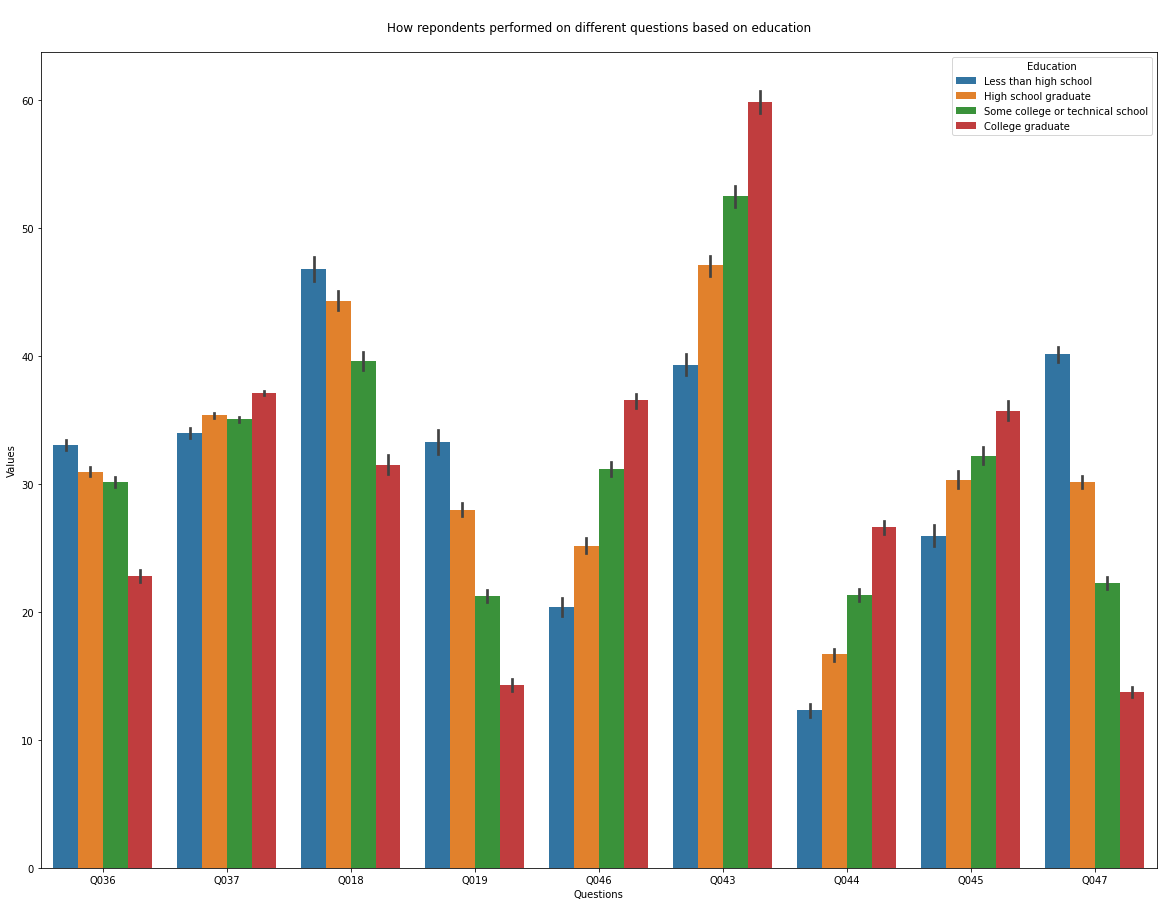

In [95]:
plt.figure(figsize=(20, 15));
sns.barplot(data=education_df, x='QuestionID', y='Data_Value', hue='Education');
plt.title('\nHow repondents performed on different questions based on education\n');
plt.xlabel('Questions');
plt.ylabel('Values');

In [120]:
questions_df

,QuestionID,Question
0,Q036,Percent of adults aged 18 years and older who have obesity
1,Q037,Percent of adults aged 18 years and older who have an overweight classification
2,Q018,Percent of adults who report consuming fruit less than one time daily
3,Q019,Percent of adults who report consuming vegetables less than one time daily
4,Q046,Percent of adults who engage in muscle-strengthening activities on 2 or more days a week
5,Q043,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
6,Q044,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week
7,Q045,Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
8,Q047,Percent of adults who engage in no leisure-time physical activity


> The data suggests that as someone climbs higher up the education ladder, they are less likely to be obese. In fact, there is a 10% difference between people with less than high school education and those that have ontained college education. However, the data does not show any correlation between being overweight and education status.
>
>

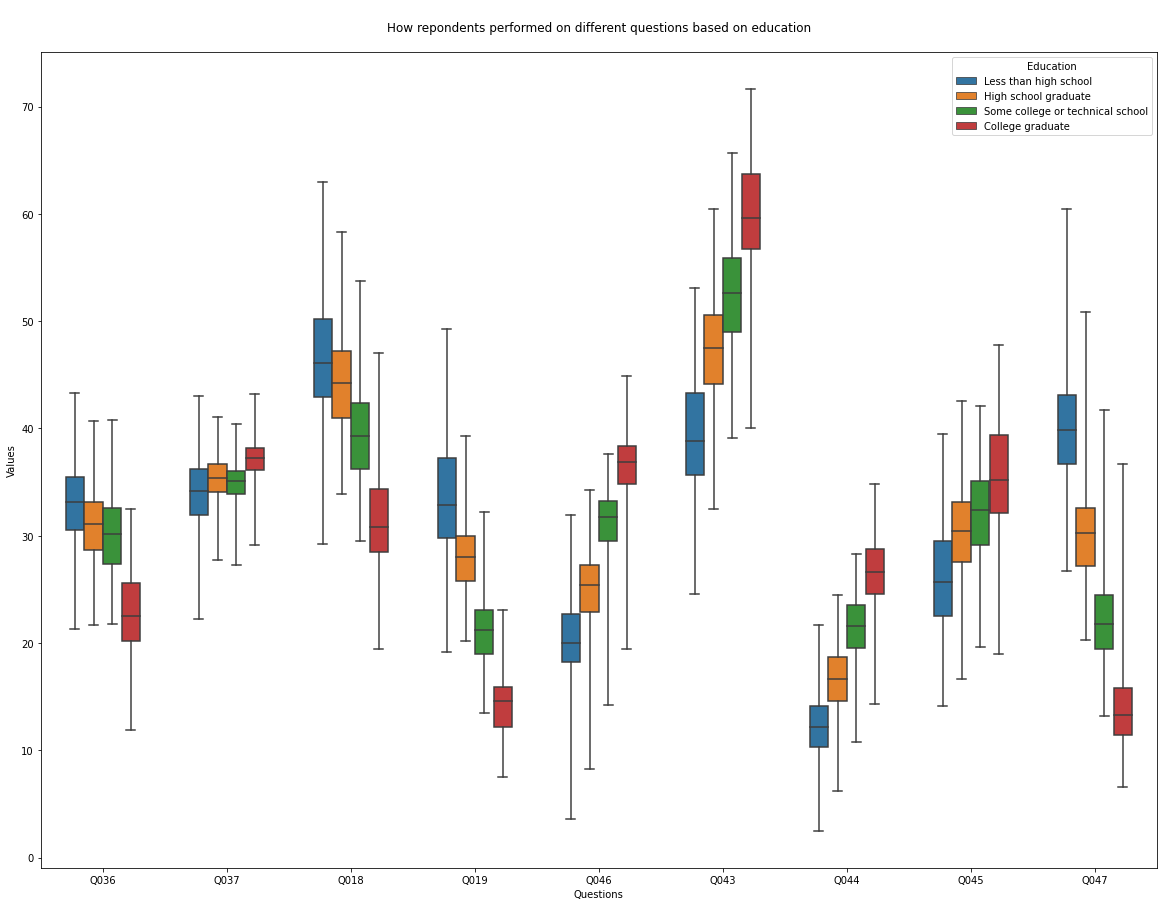

In [97]:
plt.figure(figsize=(20, 15));
sns.boxplot(x="QuestionID", y="Data_Value", data=education_df, hue='Education', whis=[0, 100], width=.6)
plt.title('\nHow repondents performed on different questions based on education\n');
plt.xlabel('Questions');
plt.ylabel('Values');

In [103]:
age_df = atomic_df[atomic_df['StratificationCategory1'] == 'Age (years)']
age_df.reset_index(drop=True, inplace=True)
age_df.head()

,Year,LocationAbbr,Data_Value,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Gender,Income,Race/Ethnicity,ClassID,TopicID,QuestionID,StratificationCategory1,Stratification1
0,2011,AL,16.3,NaN,12.6,20.9,356.0,18 - 24,NaN,NaN,NaN,NaN,OWS,OWS1,Q036,Age (years),18 - 24
1,2011,AL,35.2,NaN,30.7,40.0,598.0,25 - 34,NaN,NaN,NaN,NaN,OWS,OWS1,Q036,Age (years),25 - 34
2,2011,AL,35.5,NaN,31.6,39.6,865.0,35 - 44,NaN,NaN,NaN,NaN,OWS,OWS1,Q036,Age (years),35 - 44
3,2011,AL,38.0,NaN,34.5,41.5,1288.0,45 - 54,NaN,NaN,NaN,NaN,OWS,OWS1,Q036,Age (years),45 - 54
4,2011,AL,36.4,NaN,33.4,39.5,1676.0,55 - 64,NaN,NaN,NaN,NaN,OWS,OWS1,Q036,Age (years),55 - 64


In [104]:
age_df = age_df.drop(['Education', 'Income', 'Race/Ethnicity', 'Data_Value_Footnote', 'Gender', 'StratificationCategory1', 'Stratification1'], axis=1)
age_df.head()

,Year,LocationAbbr,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),ClassID,TopicID,QuestionID
0,2011,AL,16.3,12.6,20.9,356.0,18 - 24,OWS,OWS1,Q036
1,2011,AL,35.2,30.7,40.0,598.0,25 - 34,OWS,OWS1,Q036
2,2011,AL,35.5,31.6,39.6,865.0,35 - 44,OWS,OWS1,Q036
3,2011,AL,38.0,34.5,41.5,1288.0,45 - 54,OWS,OWS1,Q036
4,2011,AL,36.4,33.4,39.5,1676.0,55 - 64,OWS,OWS1,Q036


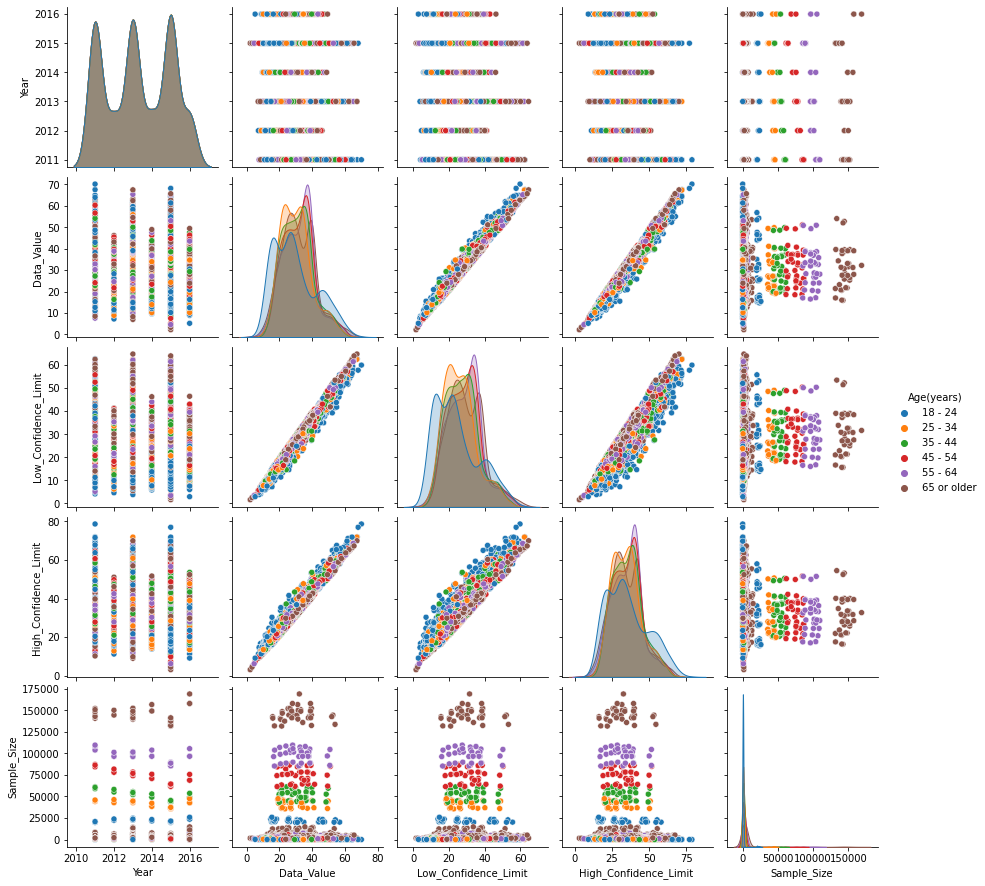

In [106]:
sns.pairplot(age_df, hue='Age(years)');

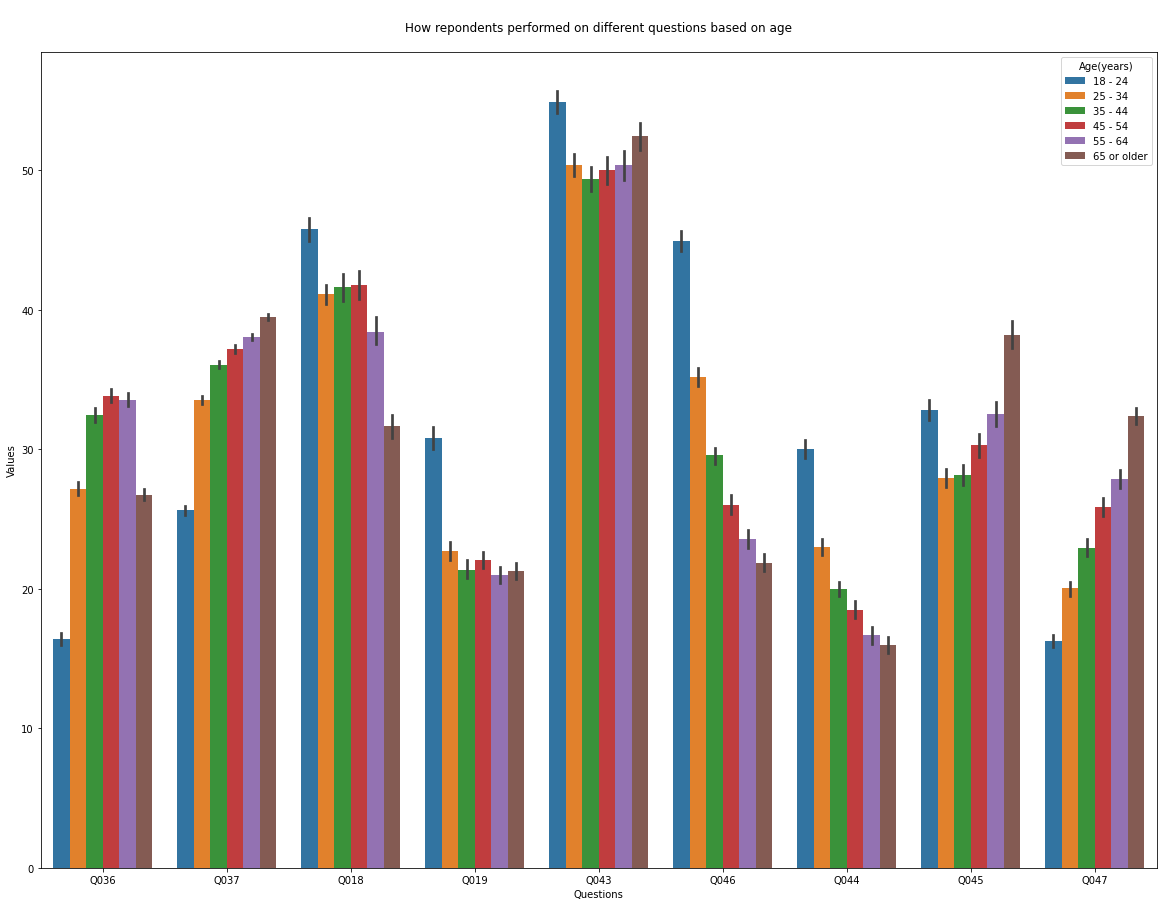

In [107]:
plt.figure(figsize=(20, 15));
sns.barplot(data=age_df, x='QuestionID', y='Data_Value', hue='Age(years)');
plt.title('\nHow repondents performed on different questions based on age\n');
plt.xlabel('Questions');
plt.ylabel('Values');

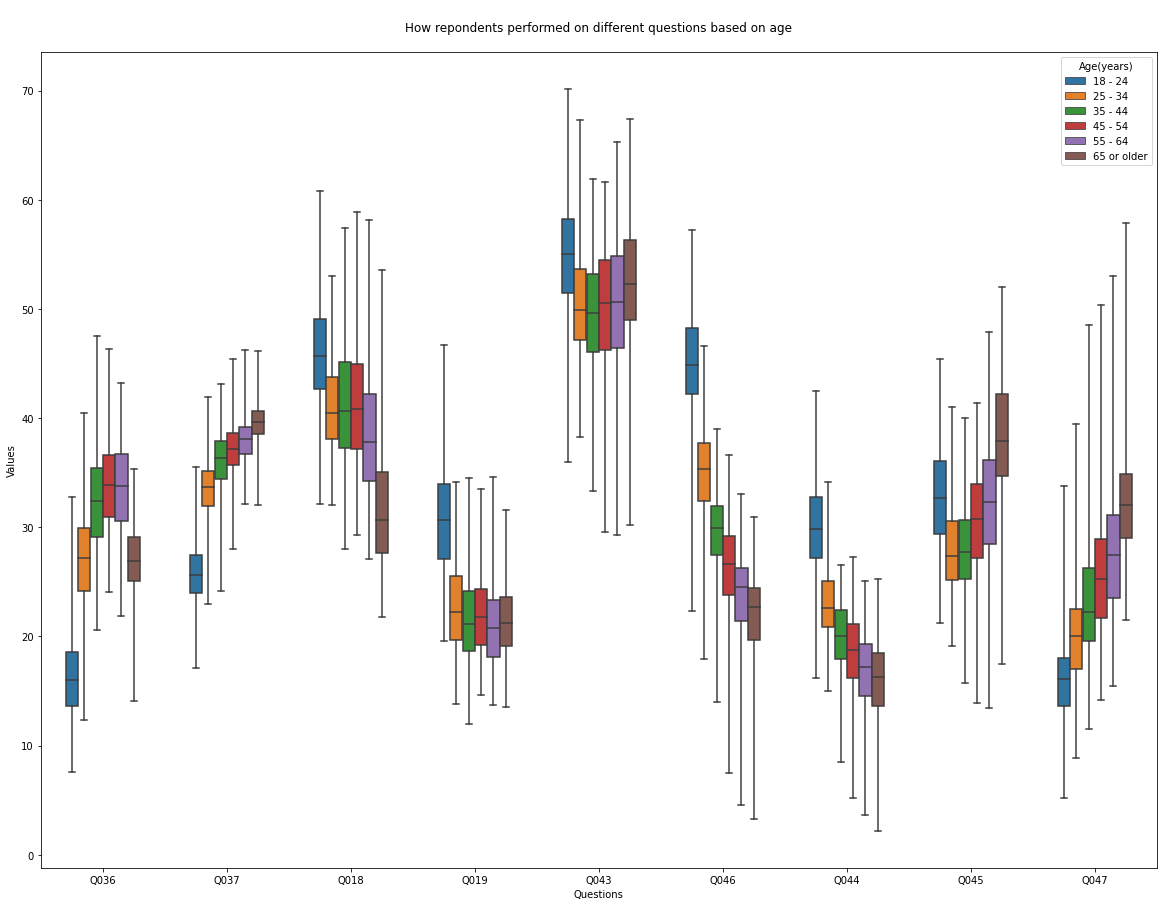

In [108]:
plt.figure(figsize=(20, 15));
sns.boxplot(x="QuestionID", y="Data_Value", data=age_df, hue='Age(years)', whis=[0, 100], width=.6)
plt.title('\nHow repondents performed on different questions based on age\n');
plt.xlabel('Questions');
plt.ylabel('Values');

In [109]:
income_df = atomic_df[atomic_df['StratificationCategory1'] == 'Income']
income_df.reset_index(drop=True, inplace=True)
income_df.head()

,Year,LocationAbbr,Data_Value,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Gender,Income,Race/Ethnicity,ClassID,TopicID,QuestionID,StratificationCategory1,Stratification1
0,2011,AL,38.5,NaN,34.4,42.8,1112.0,NaN,NaN,NaN,"Less than $15,000",NaN,OWS,OWS1,Q036,Income,"Less than $15,000"
1,2011,AL,34.8,NaN,31.3,38.5,1367.0,NaN,NaN,NaN,"$15,000 - $24,999",NaN,OWS,OWS1,Q036,Income,"$15,000 - $24,999"
2,2011,AL,35.8,NaN,31.1,40.8,757.0,NaN,NaN,NaN,"$25,000 - $34,999",NaN,OWS,OWS1,Q036,Income,"$25,000 - $34,999"
3,2011,AL,32.3,NaN,28.0,36.8,861.0,NaN,NaN,NaN,"$35,000 - $49,999",NaN,OWS,OWS1,Q036,Income,"$35,000 - $49,999"
4,2011,AL,34.1,NaN,29.7,38.8,785.0,NaN,NaN,NaN,"$50,000 - $74,999",NaN,OWS,OWS1,Q036,Income,"$50,000 - $74,999"


In [110]:
income_df = income_df.drop(['Education', 'Age(years)', 'Race/Ethnicity', 'Data_Value_Footnote', 'Gender', 'StratificationCategory1', 'Stratification1'], axis=1)
income_df.head()

,Year,LocationAbbr,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Income,ClassID,TopicID,QuestionID
0,2011,AL,38.5,34.4,42.8,1112.0,"Less than $15,000",OWS,OWS1,Q036
1,2011,AL,34.8,31.3,38.5,1367.0,"$15,000 - $24,999",OWS,OWS1,Q036
2,2011,AL,35.8,31.1,40.8,757.0,"$25,000 - $34,999",OWS,OWS1,Q036
3,2011,AL,32.3,28.0,36.8,861.0,"$35,000 - $49,999",OWS,OWS1,Q036
4,2011,AL,34.1,29.7,38.8,785.0,"$50,000 - $74,999",OWS,OWS1,Q036


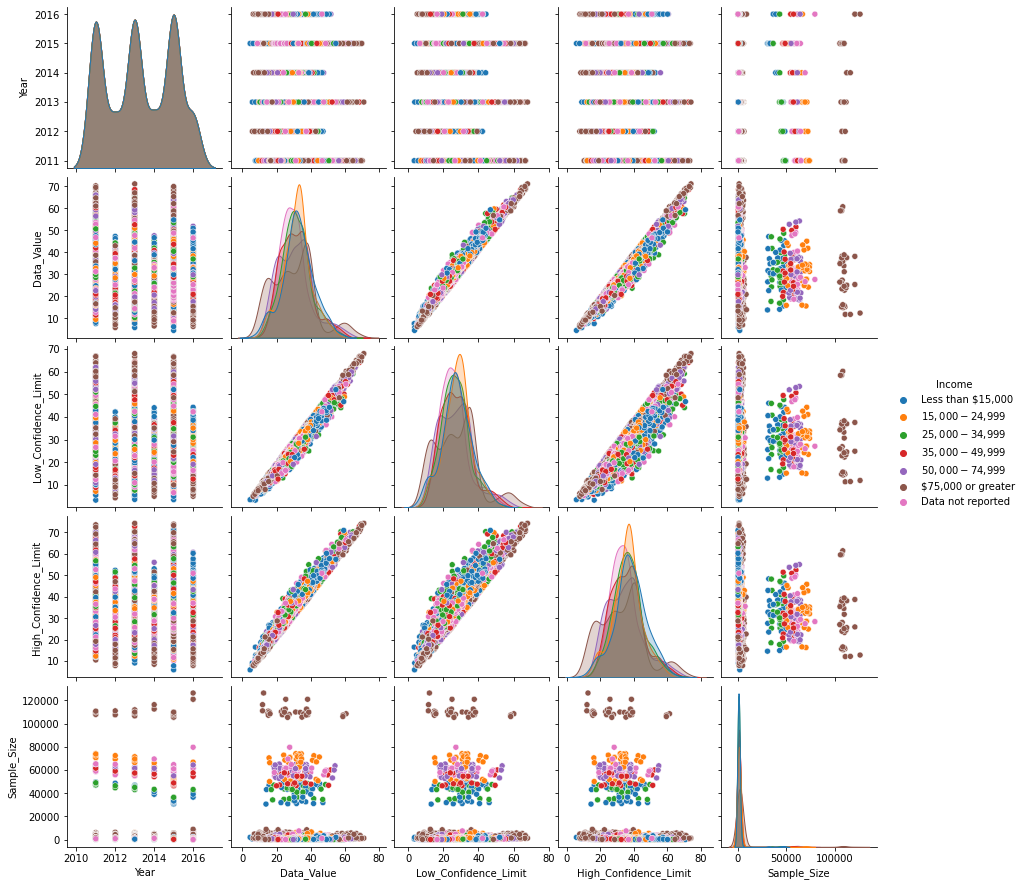

In [111]:
sns.pairplot(income_df, hue='Income');

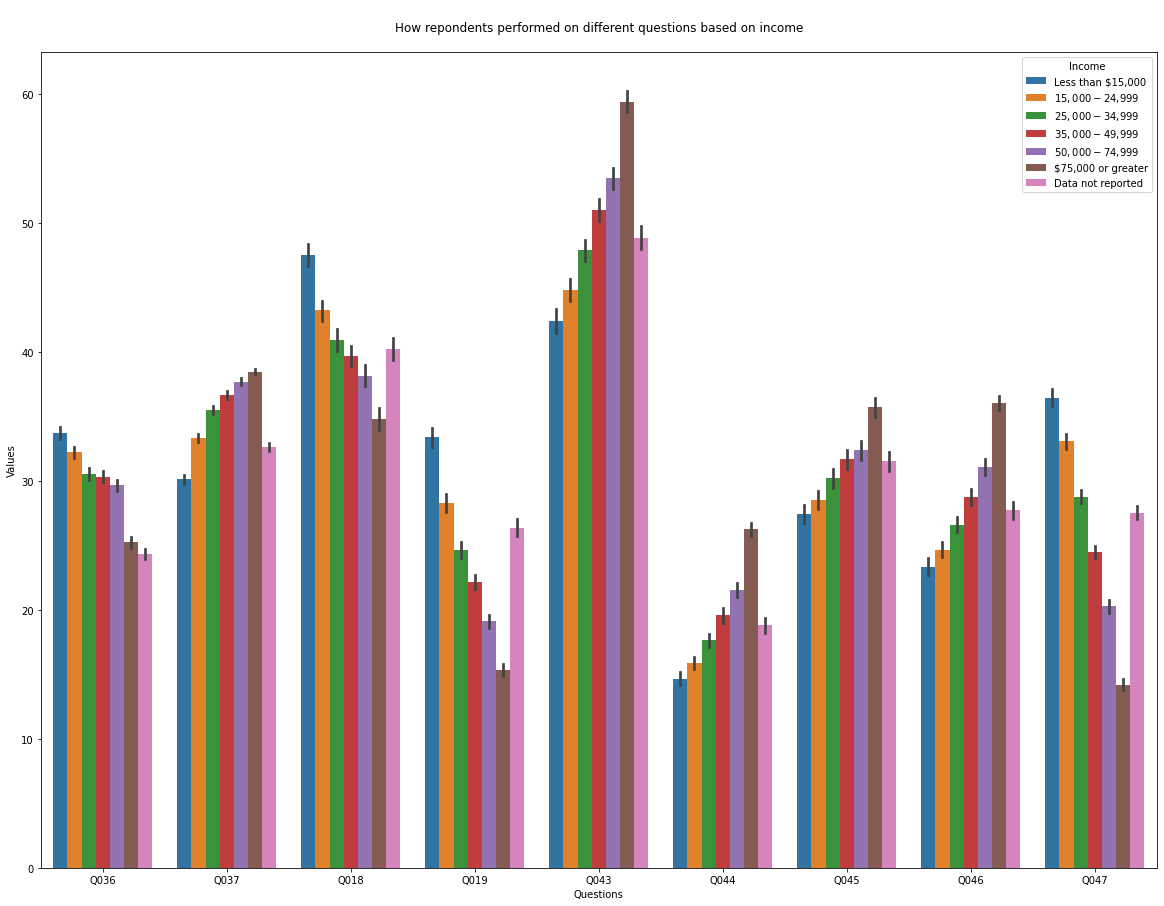

In [112]:
plt.figure(figsize=(20, 15));
sns.barplot(data=income_df, x='QuestionID', y='Data_Value', hue='Income');
plt.title('\nHow repondents performed on different questions based on income\n');
plt.xlabel('Questions');
plt.ylabel('Values');

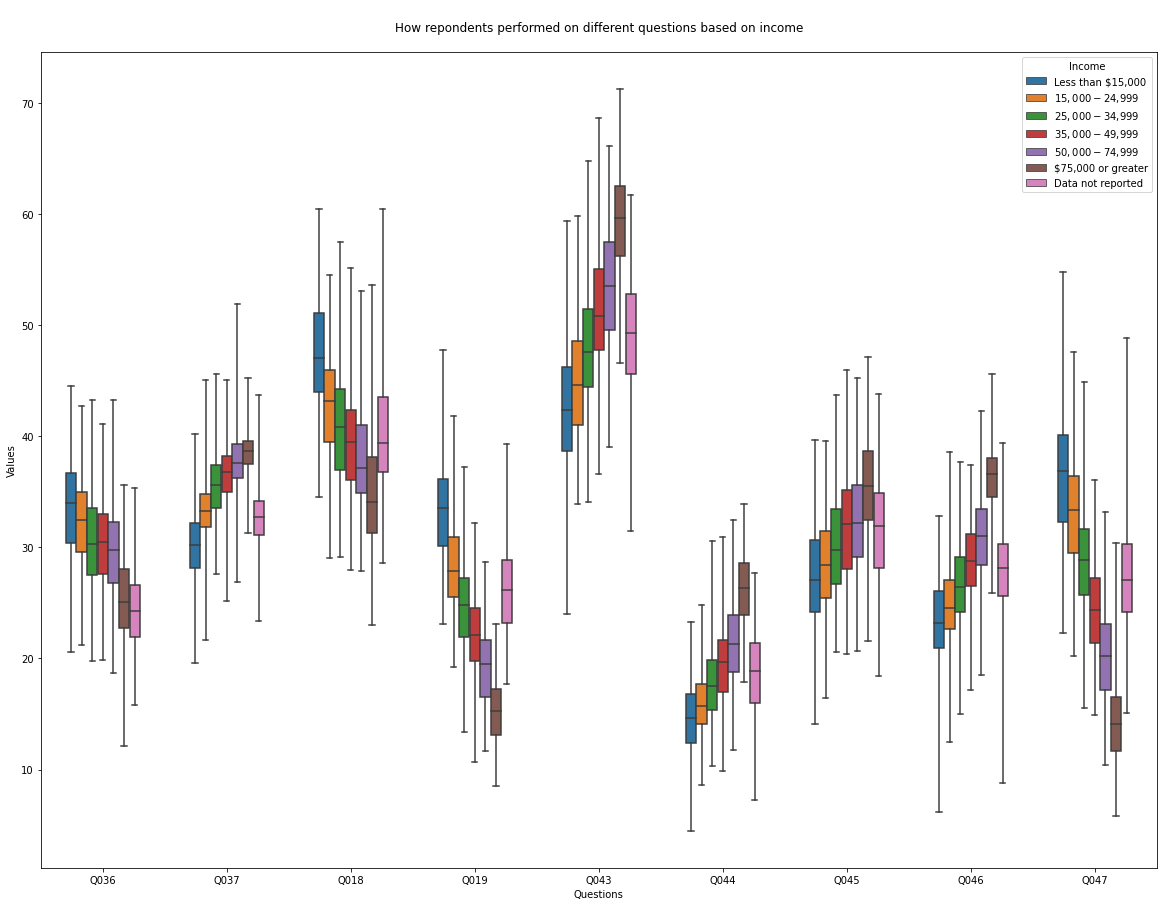

In [113]:
plt.figure(figsize=(20, 15));
sns.boxplot(x="QuestionID", y="Data_Value", data=income_df, hue='Income', whis=[0, 100], width=.6)
plt.title('\nHow repondents performed on different questions based on income\n');
plt.xlabel('Questions');
plt.ylabel('Values');

In [114]:
race_df = atomic_df[atomic_df['StratificationCategory1'] == 'Race/Ethnicity']
race_df.reset_index(drop=True, inplace=True)
race_df.head()

,Year,LocationAbbr,Data_Value,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Gender,Income,Race/Ethnicity,ClassID,TopicID,QuestionID,StratificationCategory1,Stratification1
0,2011,AL,29.8,NaN,28.0,31.6,5042.0,NaN,NaN,NaN,NaN,Non-Hispanic White,OWS,OWS1,Q036,Race/Ethnicity,Non-Hispanic White
1,2011,AL,40.1,NaN,36.9,43.3,1878.0,NaN,NaN,NaN,NaN,Non-Hispanic Black,OWS,OWS1,Q036,Race/Ethnicity,Non-Hispanic Black
2,2011,AL,28.6,NaN,17.5,43.1,115.0,NaN,NaN,NaN,NaN,Hispanic,OWS,OWS1,Q036,Race/Ethnicity,Hispanic
3,2011,AL,NaN,Data not available because sample size is insufficient.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asian,OWS,OWS1,Q036,Race/Ethnicity,Asian
4,2011,AL,NaN,Data not available because sample size is insufficient.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hawaiian/Pacific Islander,OWS,OWS1,Q036,Race/Ethnicity,Hawaiian/Pacific Islander


In [116]:
race_df = race_df.drop(['Education', 'Age(years)', 'Income', 'Data_Value_Footnote', 'Gender', 'StratificationCategory1', 'Stratification1'], axis=1)
race_df.head()

,Year,LocationAbbr,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Race/Ethnicity,ClassID,TopicID,QuestionID
0,2011,AL,29.8,28.0,31.6,5042.0,Non-Hispanic White,OWS,OWS1,Q036
1,2011,AL,40.1,36.9,43.3,1878.0,Non-Hispanic Black,OWS,OWS1,Q036
2,2011,AL,28.6,17.5,43.1,115.0,Hispanic,OWS,OWS1,Q036
3,2011,AL,NaN,NaN,NaN,NaN,Asian,OWS,OWS1,Q036
4,2011,AL,NaN,NaN,NaN,NaN,Hawaiian/Pacific Islander,OWS,OWS1,Q036


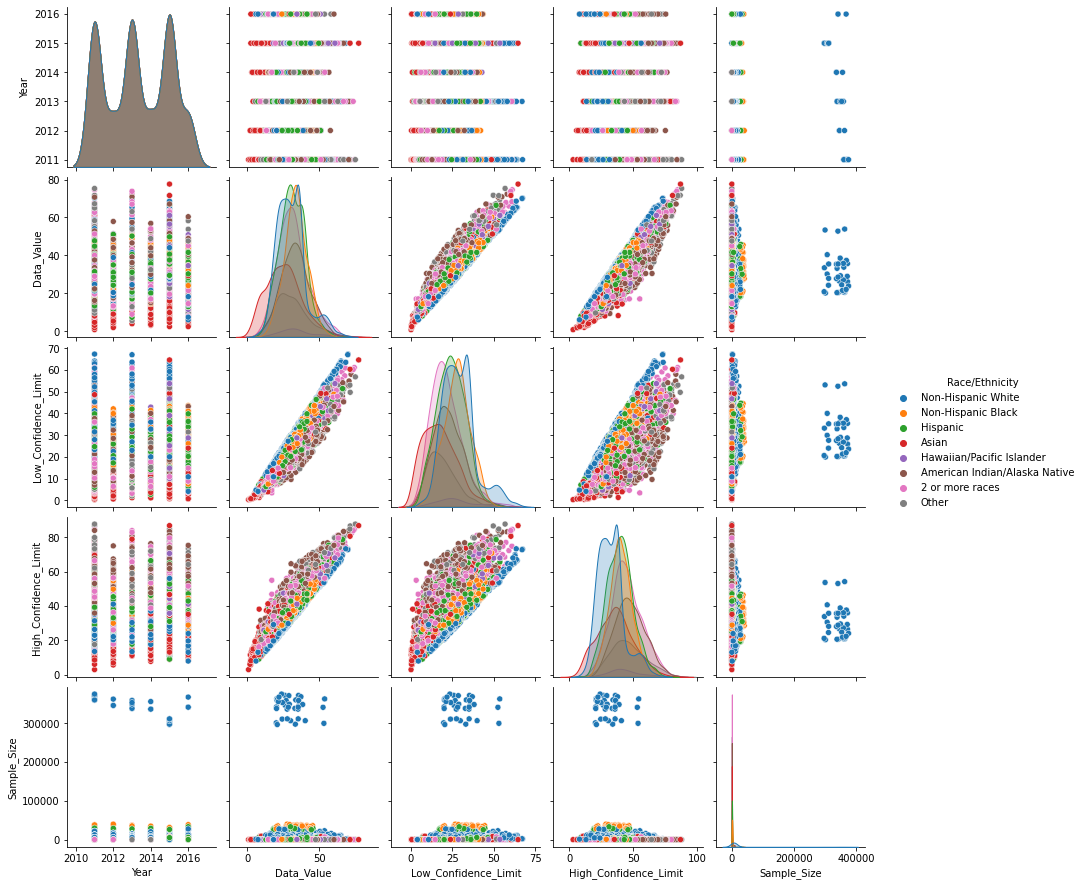

In [117]:
sns.pairplot(race_df, hue='Race/Ethnicity');

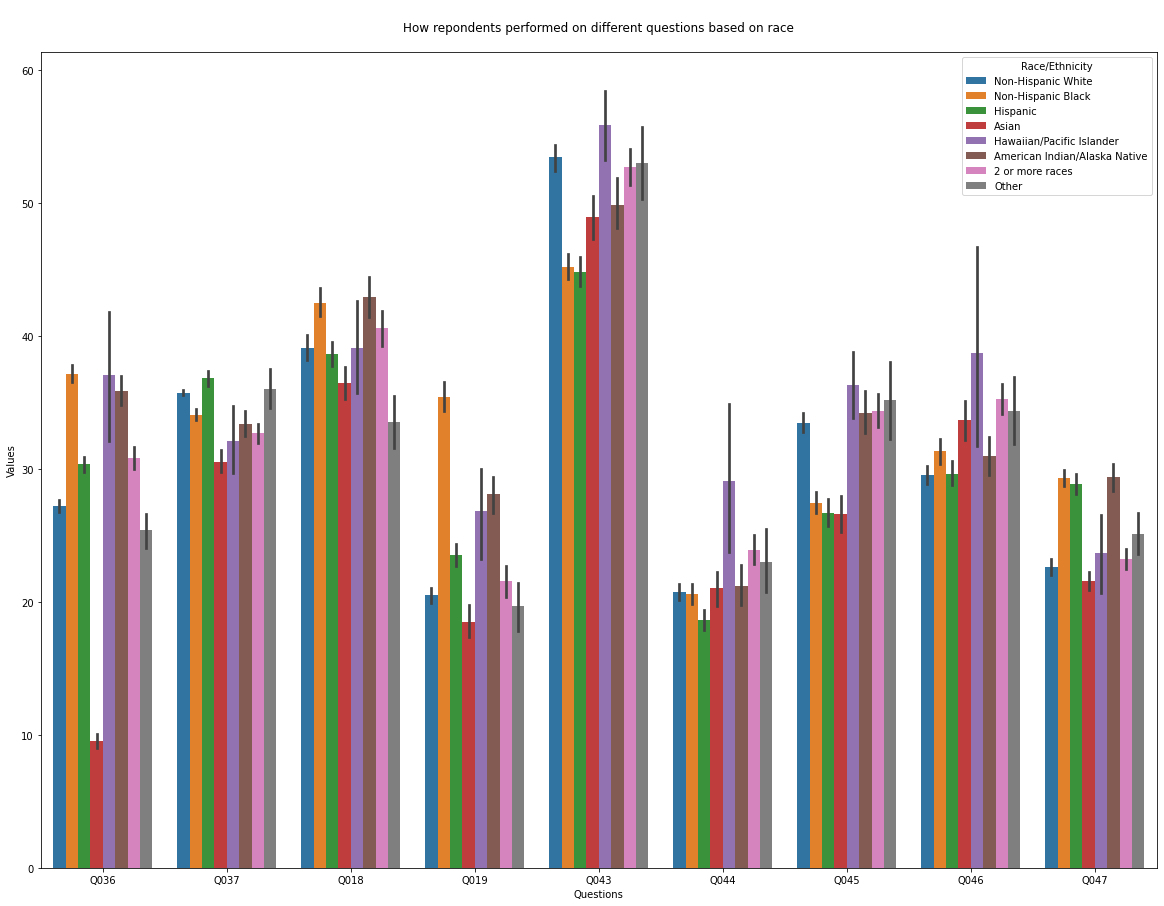

In [118]:
plt.figure(figsize=(20, 15));
sns.barplot(data=race_df, x='QuestionID', y='Data_Value', hue='Race/Ethnicity');
plt.title('\nHow repondents performed on different questions based on race\n');
plt.xlabel('Questions');
plt.ylabel('Values');

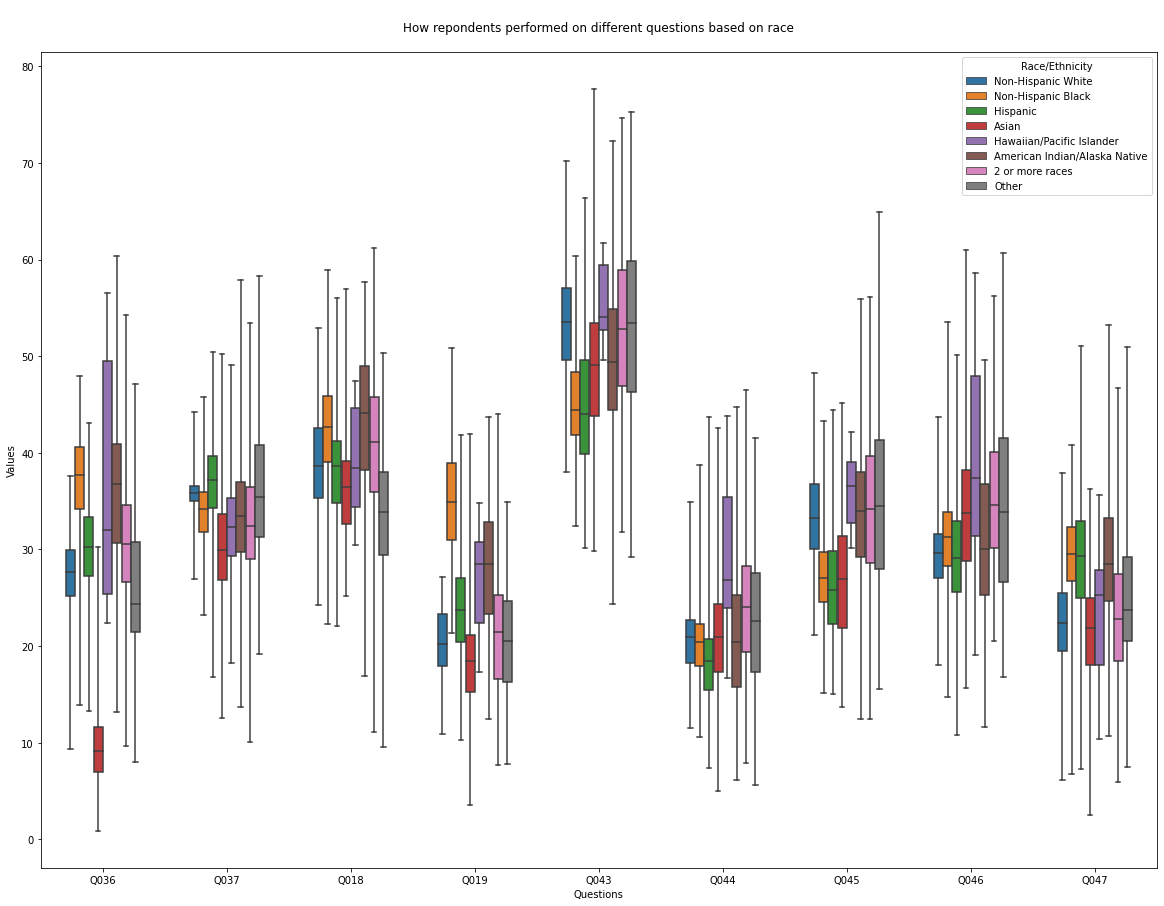

In [119]:
plt.figure(figsize=(20, 15));
sns.boxplot(x="QuestionID", y="Data_Value", data=race_df, hue='Race/Ethnicity', whis=[0, 100], width=.6)
plt.title('\nHow repondents performed on different questions based on race\n');
plt.xlabel('Questions');
plt.ylabel('Values');

In [68]:
gender_df = atomic_df[atomic_df['StratificationCategory1'] == 'Gender']
gender_df.reset_index(drop=True, inplace=True)
gender_df.head()

,Year,LocationAbbr,Data_Value,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Gender,Income,Race/Ethnicity,ClassID,TopicID,QuestionID,StratificationCategory1,Stratification1
0,2011,AL,32.3,NaN,29.9,34.7,2581.0,NaN,NaN,Male,NaN,NaN,OWS,OWS1,Q036,Gender,Male
1,2011,AL,31.8,NaN,30.0,33.6,4723.0,NaN,NaN,Female,NaN,NaN,OWS,OWS1,Q036,Gender,Female
2,2011,AL,39.0,NaN,36.5,41.6,2581.0,NaN,NaN,Male,NaN,NaN,OWS,OWS1,Q037,Gender,Male
3,2011,AL,30.5,NaN,28.7,32.4,4723.0,NaN,NaN,Female,NaN,NaN,OWS,OWS1,Q037,Gender,Female
4,2011,AL,40.1,NaN,38.2,42.1,4792.0,NaN,NaN,Female,NaN,NaN,FV,FV1,Q018,Gender,Female


In [63]:
gender_df.dtypes

Year                         int64
LocationAbbr                object
Data_Value                 float64
Data_Value_Footnote         object
Low_Confidence_Limit       float64
High_Confidence_Limit      float64
Sample_Size                float64
Age(years)                  object
Education                   object
Gender                      object
Income                      object
Race/Ethnicity              object
ClassID                     object
TopicID                     object
QuestionID                  object
StratificationCategory1     object
Stratification1             object
dtype: object

In [64]:
gender_df.shape

(3814, 17)

In [65]:
gender_encoding = {'Gender': {'Male': 1, 'Female': 0}}

In [69]:
gender_df = gender_df.replace(gender_encoding)
gender_df.head()

,Year,LocationAbbr,Data_Value,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Gender,Income,Race/Ethnicity,ClassID,TopicID,QuestionID,StratificationCategory1,Stratification1
0,2011,AL,32.3,NaN,29.9,34.7,2581.0,NaN,NaN,1,NaN,NaN,OWS,OWS1,Q036,Gender,Male
1,2011,AL,31.8,NaN,30.0,33.6,4723.0,NaN,NaN,0,NaN,NaN,OWS,OWS1,Q036,Gender,Female
2,2011,AL,39.0,NaN,36.5,41.6,2581.0,NaN,NaN,1,NaN,NaN,OWS,OWS1,Q037,Gender,Male
3,2011,AL,30.5,NaN,28.7,32.4,4723.0,NaN,NaN,0,NaN,NaN,OWS,OWS1,Q037,Gender,Female
4,2011,AL,40.1,NaN,38.2,42.1,4792.0,NaN,NaN,0,NaN,NaN,FV,FV1,Q018,Gender,Female


In [70]:
gender_df.isnull().sum().sort_values()

Year                          0
QuestionID                    0
TopicID                       0
ClassID                       0
Gender                        0
StratificationCategory1       0
Stratification1               0
High_Confidence_Limit         0
Low_Confidence_Limit          0
Data_Value                    0
LocationAbbr                  0
Sample_Size                   0
Age(years)                 3814
Income                     3814
Race/Ethnicity             3814
Data_Value_Footnote        3814
Education                  3814
dtype: int64

In [72]:
gender_df = gender_df.drop(['Age(years)', 'Income', 'Race/Ethnicity', 'Data_Value_Footnote', 'Education'], axis=1)
gender_df.head()

,Year,LocationAbbr,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,ClassID,TopicID,QuestionID,StratificationCategory1,Stratification1
0,2011,AL,32.3,29.9,34.7,2581.0,1,OWS,OWS1,Q036,Gender,Male
1,2011,AL,31.8,30.0,33.6,4723.0,0,OWS,OWS1,Q036,Gender,Female
2,2011,AL,39.0,36.5,41.6,2581.0,1,OWS,OWS1,Q037,Gender,Male
3,2011,AL,30.5,28.7,32.4,4723.0,0,OWS,OWS1,Q037,Gender,Female
4,2011,AL,40.1,38.2,42.1,4792.0,0,FV,FV1,Q018,Gender,Female


In [73]:
for col in gender_df.columns:
    print(f'{col} has {gender_df[col].nunique()} unique values')

Year has 6 unique values
LocationAbbr has 55 unique values
Data_Value has 483 unique values
Low_Confidence_Limit has 469 unique values
High_Confidence_Limit  has 481 unique values
Sample_Size has 2476 unique values
Gender has 2 unique values
ClassID has 3 unique values
TopicID has 3 unique values
QuestionID has 9 unique values
StratificationCategory1 has 1 unique values
Stratification1 has 2 unique values


In [74]:
gender_df = gender_df.drop(['StratificationCategory1', 'Stratification1'], axis=1)
gender_df.head()

,Year,LocationAbbr,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,ClassID,TopicID,QuestionID
0,2011,AL,32.3,29.9,34.7,2581.0,1,OWS,OWS1,Q036
1,2011,AL,31.8,30.0,33.6,4723.0,0,OWS,OWS1,Q036
2,2011,AL,39.0,36.5,41.6,2581.0,1,OWS,OWS1,Q037
3,2011,AL,30.5,28.7,32.4,4723.0,0,OWS,OWS1,Q037
4,2011,AL,40.1,38.2,42.1,4792.0,0,FV,FV1,Q018


In [75]:
gender_df['ClassID'].unique()

array(['OWS', 'FV', 'PA'], dtype=object)

In [ ]:
class_mapping = {'ClassID': {'OWS': 0, 'FV': 1, 'PA', 2}}

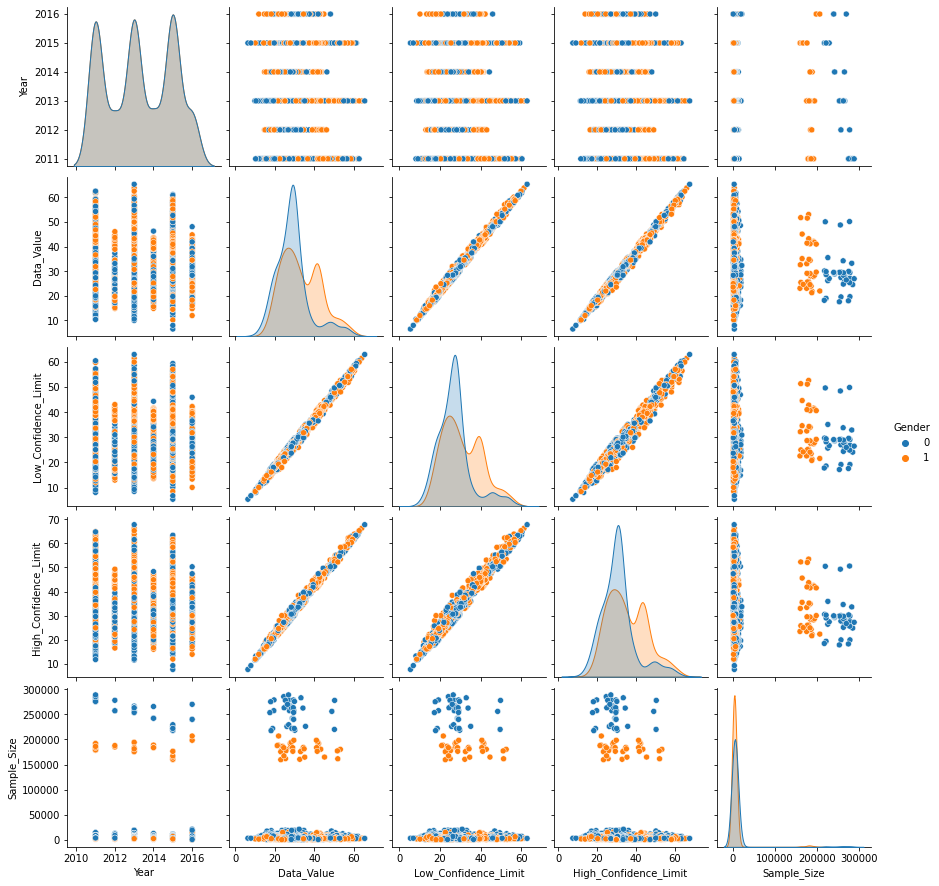

In [89]:
sns.pairplot(gender_df, hue='Gender');

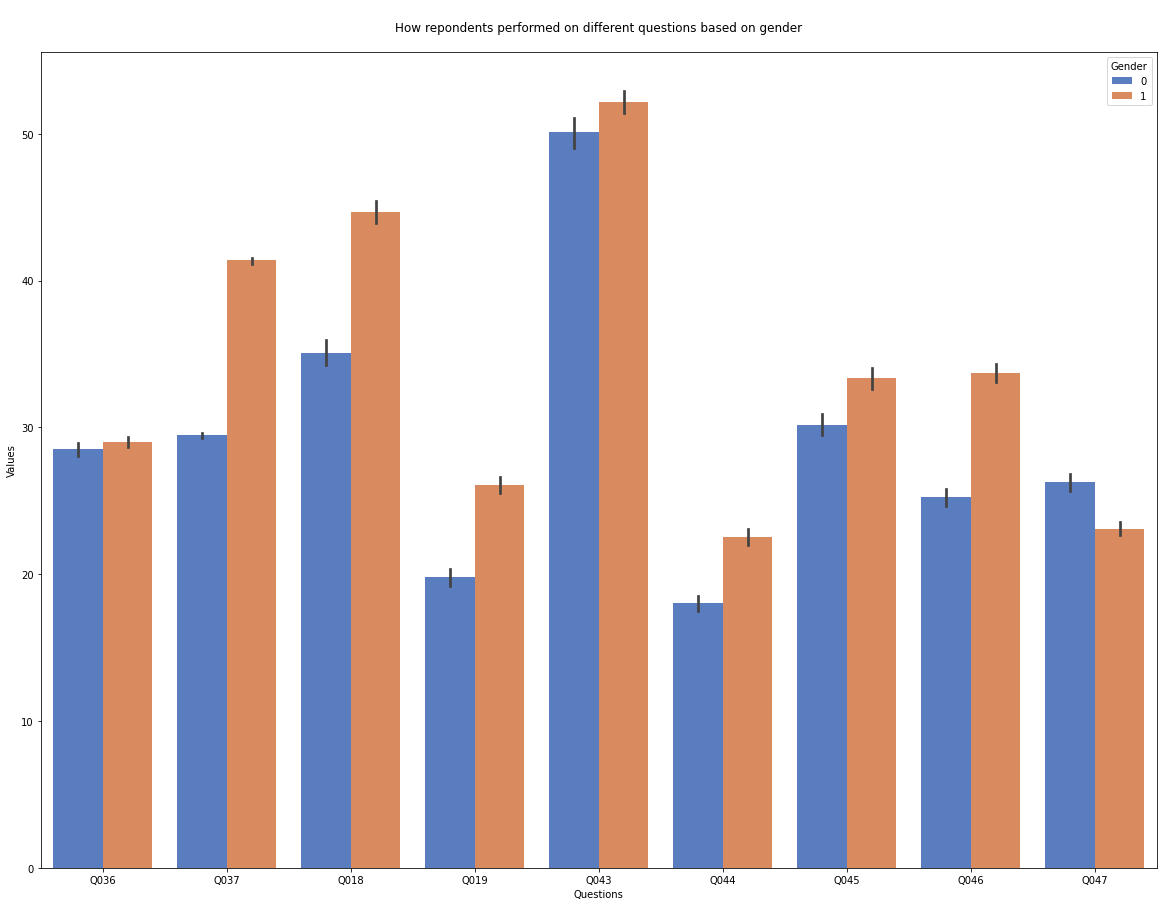

In [85]:
plt.figure(figsize=(20, 15));
sns.barplot(data=gender_df, x='QuestionID', y='Data_Value', hue='Gender', palette='muted');
plt.title('\nHow repondents performed on different questions based on gender\n');
plt.xlabel('Questions');
plt.ylabel('Values');

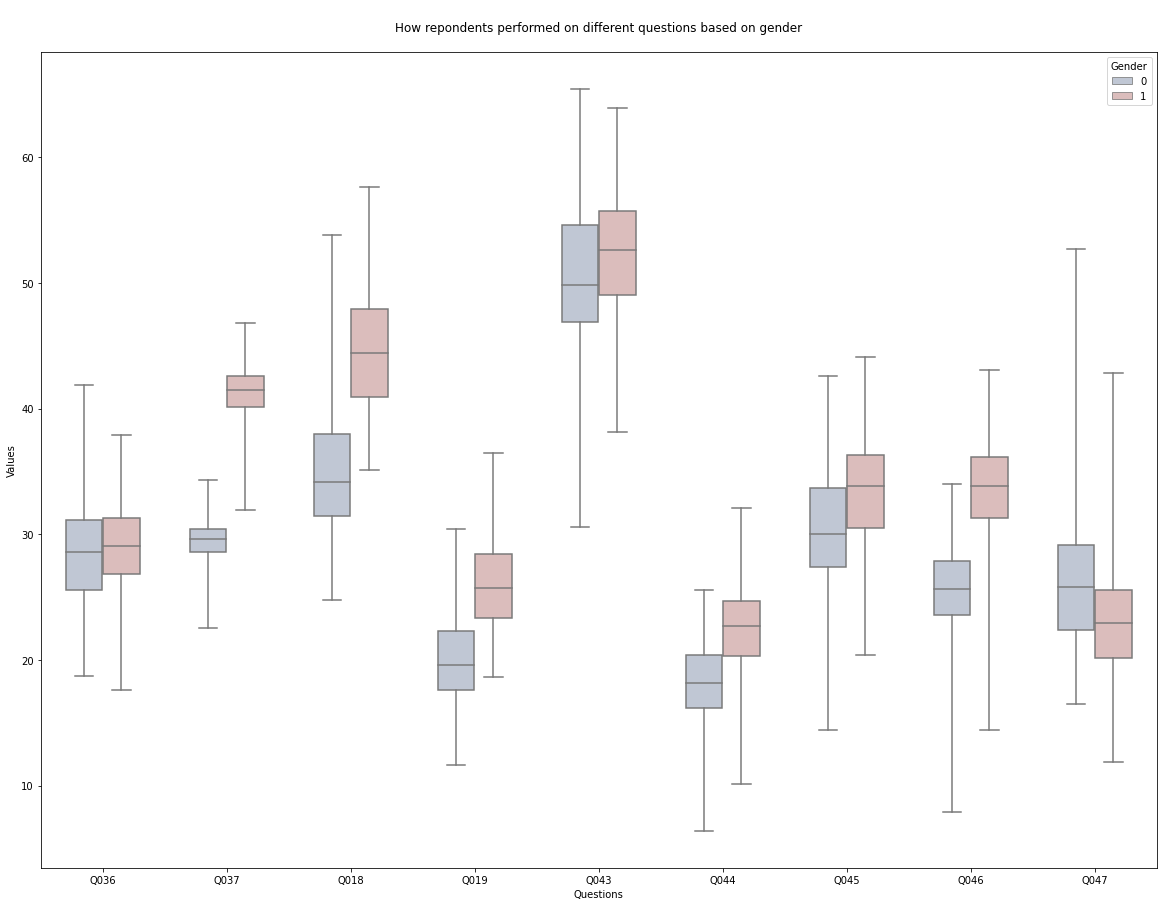

In [83]:
plt.figure(figsize=(20, 15));
sns.boxplot(x="QuestionID", y="Data_Value", data=gender_df, hue='Gender', whis=[0, 100], width=.6, palette="vlag")
plt.title('\nHow repondents performed on different questions based on gender\n');
plt.xlabel('Questions');
plt.ylabel('Values');

In [ ]:
sns.violinplot(x="day", y="total_bill", hue="Gender", data=tips, palette="vlag", split=True)